## BLOSSOM BANK ONLINE PAYMENT FRAUD.

Blossom Bank also known as BB PLC is a
multinational financial services group, that
offers retail and investment banking, pension
management, asset management and
payments services, headquartered in London,
UK.

## PROBLEM
Blossom Bank wants to build a Machine
Learning model to predict online payment
fraud.


In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load the dataset (10Alytics Data)
df = pd.read_csv(r"C:\Users\Aanu_Ooo\Desktop\analyst\10Alytics\python Challenge\Capstone Project\Online Payment Fraud Detection.csv")

In [3]:
# Print the top 5 rows
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


## Exploratory Data Analysis - EDA 

- Print the top 5 rows
- Print the bottom 5 rows
- Provide the full information of the Dataset
- Provide statistical information on the dataset

In [4]:
# Print the bottom 5 rows
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [5]:
#the shape attribute
df.shape

(1048575, 10)

In [6]:
# Provide the full information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [7]:
#To view the column of the data
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [8]:
# Provide statistical information on the dataset
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [9]:
#Check if there is missing data in the data set.
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

## Data Wrangling

Data wrangling is the process of removing errors and combining complex datasets to make them more accessible and easier to analyze. A Data wrangling process consist of reorganizing, transforming and mapping data from one "raw" form into another in order to make it more usable and valuable.

Will start by rearranging the dataset columns:
- nameOrig = cust_name
- oldbalanceOrig = cust_old_bal
- newbalanceOrg = cust_new_bal
- nameDest = fraud_name
- oldbalanceDest = fraud_old_bal
- newbalanceDest = fraud_new_bal

In [10]:
#renaming some column names for better understanding

df.rename(columns = {'nameOrig': 'cust_name', 'oldbalanceOrg': 'cust_old_bal', 'newbalanceOrig': 'cust_new_bal', 'nameDest': 'fraud_name', 'oldbalanceDest': 'fraud_old_bal', 'newbalanceDest': 'fraud_new_bal'}, inplace = True)

df.head()

,step,type,amount,cust_name,cust_old_bal,cust_new_bal,fraud_name,fraud_old_bal,fraud_new_bal,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


## ANALYSIS

In [11]:
#total fraud attempted

df.isFraud.count()

1048575

In [12]:
#how many listings per type
df.type.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

<AxesSubplot:ylabel='type'>

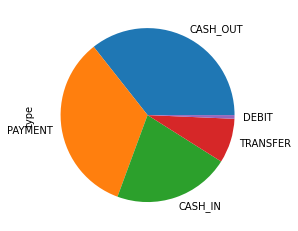

In [13]:
df["type"].value_counts(normalize=True).plot.pie()

<AxesSubplot:>

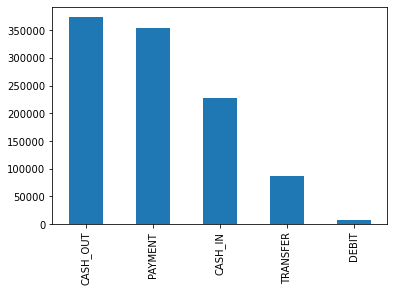

In [14]:
#plot type counts
df.type.value_counts().plot.bar()

<AxesSubplot:>

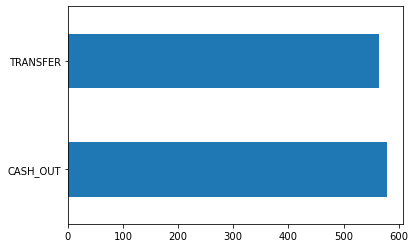

In [15]:
df[df.isFraud == 1].type.value_counts().plot.barh()

In [16]:
#check unique values in cust_name column
df["cust_name"].unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C2037964975',
       'C1633237354', 'C1264356443'], dtype=object)

In [17]:
df["cust_name"].count()

1048575

In [18]:
#check unique values in fraud_name column
df["fraud_name"].unique()

array(['M1979787155', 'M2044282225', 'C553264065', ..., 'M1355182933',
       'M1964992463', 'M677577406'], dtype=object)

In [19]:
df["fraud_name"].count()

1048575

In [20]:
#check unique values in isFraud column
df["isFraud"].unique()

array([0, 1], dtype=int64)

In [21]:
#check distribution of values in the target column. Use value_counts(normalize=True)
#plot the resulting data
df["amount"].value_counts()

10000000.00    14
706.25          6
1711.67         5
3172.71         5
5838.16         5
               ..
49696.49        1
49225.70        1
30666.99        1
328559.51       1
11450.03        1
Name: amount, Length: 1009606, dtype: int64

In [22]:
#check values in cust_old_bal column with value_counts()
df["cust_old_bal"].value_counts()

0.00           342214
10100000.00       433
10300000.00       424
10200000.00       421
10900000.00       387
                ...  
295871.52           1
306220.00           1
133756.67           1
329511.00           1
80584.95            1
Name: cust_old_bal, Length: 391033, dtype: int64

In [23]:
#check values in cust_new_bal column with value_counts()
df["cust_new_bal"].value_counts()

0.00           580275
10300000.00       450
10100000.00       449
10200000.00       435
10900000.00       405
                ...  
340001.65           1
272919.15           1
5034.69             1
17148.54            1
69134.92            1
Name: cust_new_bal, Length: 440792, dtype: int64

In [24]:
#check values in fraud_old_bal column with value_counts()
df["fraud_old_bal"].value_counts()

0.00           437134
10100000.00       314
10300000.00       304
10200000.00       295
10900000.00       295
                ...  
128780.86           1
39803.57            1
5088187.93          1
1089636.11          1
484329.37           1
Name: fraud_old_bal, Length: 590110, dtype: int64

In [25]:
#check values in fraud_new_bal column with value_counts()
df["fraud_new_bal"].value_counts()

0.00           406914
10200000.00       361
10900000.00       350
10500000.00       348
10100000.00       343
                ...  
1148591.49          1
9481174.80          1
1684398.25          1
230360.70           1
616886.72           1
Name: fraud_new_bal, Length: 437054, dtype: int64

In [26]:
#check values in cust_old_bal column with value_counts()
df["cust_old_bal"].value_counts()

0.00           342214
10100000.00       433
10300000.00       424
10200000.00       421
10900000.00       387
                ...  
295871.52           1
306220.00           1
133756.67           1
329511.00           1
80584.95            1
Name: cust_old_bal, Length: 391033, dtype: int64

## Data Understanding Question:
How many of the attempted fraud case where successful?

In [27]:
#how many listings per isFraud
df.isFraud.value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

## From the above analysis: 0 - represent unsuccessful fraud and 1 - represent successful fraud. Therefore, we had 1,047,433 unsuccessful fraud attempt while 1,142 successful fraud.

## Data Understanding Question:
Which of the type listed below gave us the highest medium of successful fraud cases?

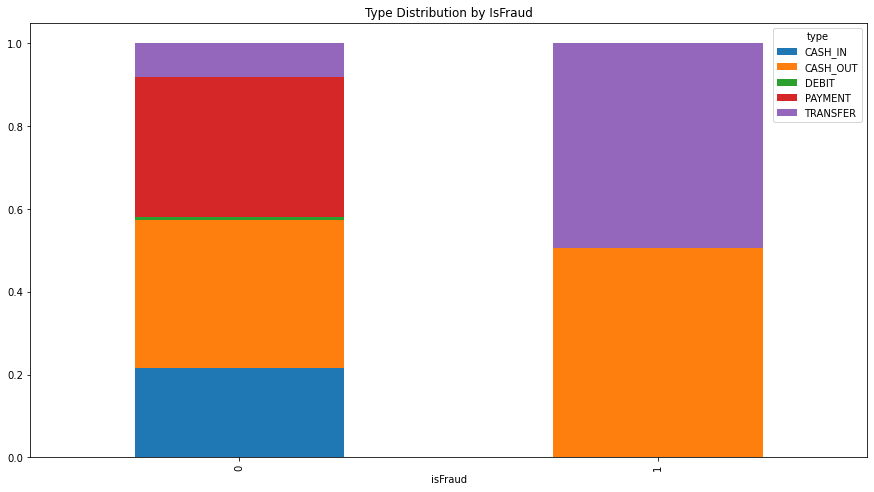

In [28]:
#create pivot of type and isFraud
type_isFraud_pivot = pd.crosstab(df.isFraud,df.type,normalize='index')

#plot the data
type_isFraud_pivot.plot.bar(stacked=True, figsize=(15,8))

plt.title('Type Distribution by IsFraud')
plt.show()

<AxesSubplot:>

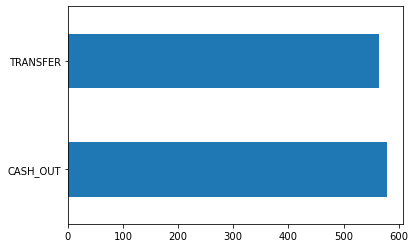

In [29]:
df[df.isFraud == 1].type.value_counts().plot.barh()

## From the chart above; looking at the successful attempted fraud we can see that:

- There are two major type of fraud channel used which were cash_out and Transfer.
- From this two type; we can also see that Cash_out has the highest successful attempted fraud among this two. 

## Explore Correlation

In [30]:
df.corr()

,step,amount,cust_old_bal,cust_new_bal,fraud_old_bal,fraud_new_bal,isFraud
step,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030
amount,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862
cust_old_bal,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829
cust_new_bal,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438
fraud_old_bal,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552
fraud_new_bal,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495
isFraud,0.045030,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000


<AxesSubplot:>

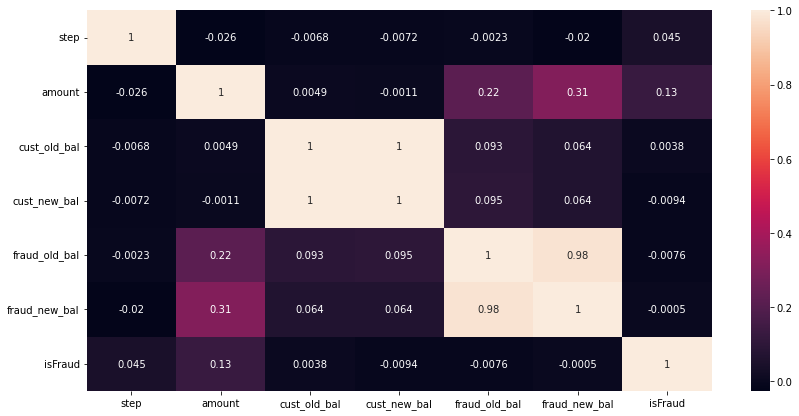

In [31]:
#Correlation using heatmap
plt.figure(figsize = (14,7))
sns.heatmap(df.corr(), annot = True)

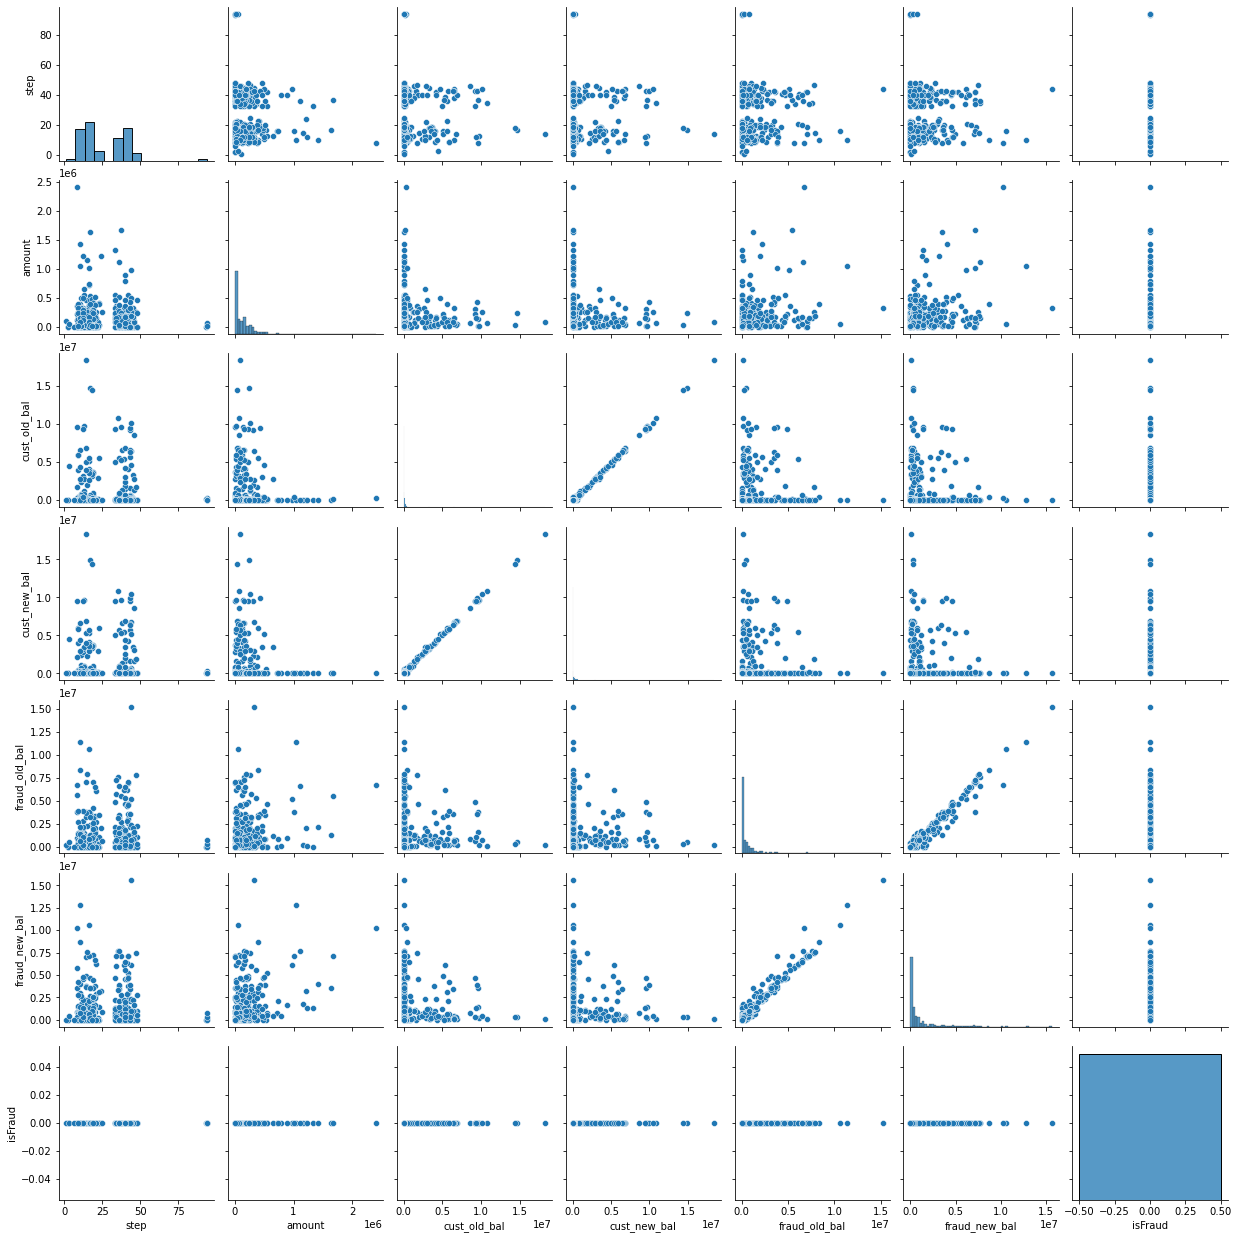

In [32]:
#visualize correlation a using seaborn pairplot

sns.pairplot(df.sample(500))
plt.show()

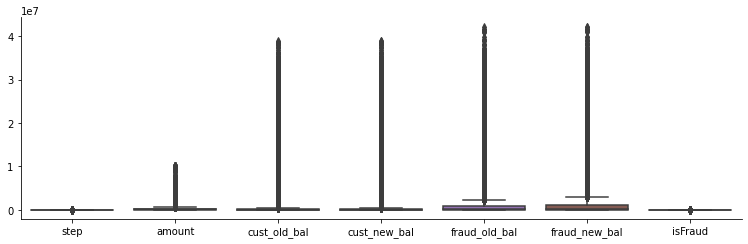

In [33]:
#visualize correlation using catplot

sns.catplot(data=df,kind='box',aspect=3,height=3.5)


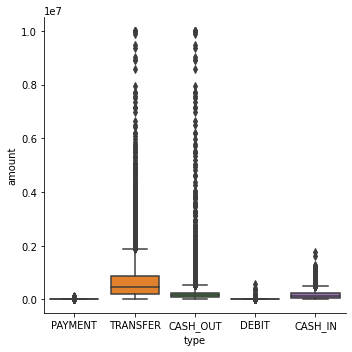

In [34]:
sns.catplot(x='type', 
            y='amount',
            data=df,
            kind='box')

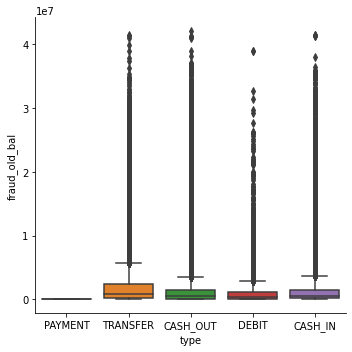

In [35]:
sns.catplot(x='type', 
            y='fraud_old_bal',
            data=df,
            kind='box')

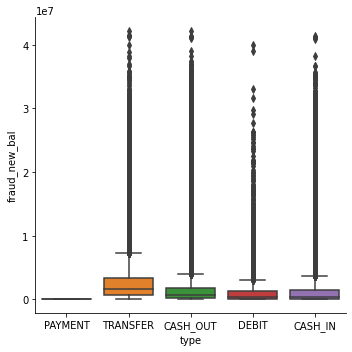

In [36]:
sns.catplot(x='type', 
            y='fraud_new_bal',
            data=df,
            kind='box')

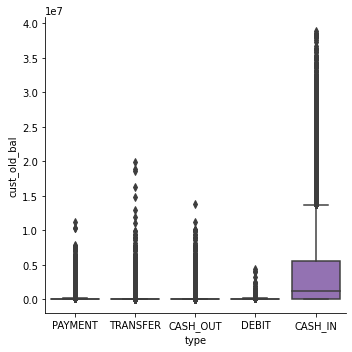

In [37]:
sns.catplot(x='type', 
            y='cust_old_bal',
            data=df,
            kind='box')

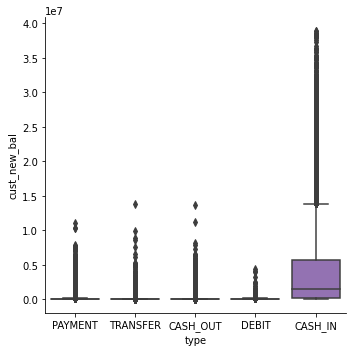

In [38]:
sns.catplot(x='type', 
            y='cust_new_bal',
            data=df,
            kind='box')

## Features Engineering

In [39]:
df.head()

,step,type,amount,cust_name,cust_old_bal,cust_new_bal,fraud_name,fraud_old_bal,fraud_new_bal,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [40]:
#1. select categorical variables

categorical = ['type']

In [41]:
#2. use pd.get_dummies() for one hot encoding

categories_dummies = pd.get_dummies(df[categorical])

#view what you have done
categories_dummies.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [42]:
#join the encoded variables back to the main dataframe using pd.concat()
#pass both df and categories_dummies as a list of their names
#pop out documentation for pd.concat() to clarify

df = pd.concat([df,categories_dummies], axis=1)

#check what you have done
print(df.shape)
df.head()

(1048575, 15)


,step,type,amount,cust_name,cust_old_bal,cust_new_bal,fraud_name,fraud_old_bal,fraud_new_bal,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [43]:
#remove the initial categorical columns now that we have encoded them
#use the list called categorical do delete all the initially selected columns at once
#replace pass in the code below

df = df.drop(categorical,axis=1)


In [44]:
print(df.shape)
df.head()

(1048575, 14)


,step,amount,cust_name,cust_old_bal,cust_new_bal,fraud_name,fraud_old_bal,fraud_new_bal,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


## Model selection, training, and validation

Choose your target

- set y as the isFraud column. 
- set X as df data except the isFraud column. 


In [45]:
y = df.isFraud

y.head()


0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [46]:
X= df.drop(columns=['isFraud','cust_name', 'fraud_name'],axis=1)
X.head()

,step,amount,cust_old_bal,cust_new_bal,fraud_old_bal,fraud_new_bal,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [47]:
#import the libraries we will need
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [48]:
#split into training and validation sets using a 40% split ratio
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.4)

In [49]:
#initialize logistic regression
LR = LogisticRegression(random_state=42)

In [50]:
#initialize k neighbors
KN = KNeighborsClassifier()

In [51]:
#initialize decision tree
DC = DecisionTreeClassifier(random_state=42)

In [52]:
#initialize random forest
RF = RandomForestClassifier(random_state=42)

In [53]:
#create list of your model names
models = [LR,KN, DC,RF]

In [54]:
#create function to train a model and evaluate accuracy
def trainer(models,X_train,y_train,X_valid,y_valid):
    #fit your model
    models.fit(X_train,y_train)
    #predict on the fitted model
    prediction = models.predict(X_valid)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(models.__class__.__name__,accuracy_score(prediction,y_valid)))
    print(classification_report(prediction,y_valid))

In [55]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_valid,y_valid)


For LogisticRegression, Accuracy score is 0.9989867200724794 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419156
           1       0.34      0.58      0.43       274

    accuracy                           1.00    419430
   macro avg       0.67      0.79      0.71    419430
weighted avg       1.00      1.00      1.00    419430


For KNeighborsClassifier, Accuracy score is 0.9993705743509048 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419141
           1       0.53      0.86      0.65       289

    accuracy                           1.00    419430
   macro avg       0.76      0.93      0.83    419430
weighted avg       1.00      1.00      1.00    419430


For DecisionTreeClassifier, Accuracy score is 0.9995756145244737 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    418953
           1       0.82      0.81      

## Inspect Feature Importances

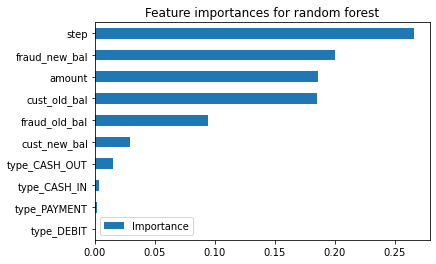

In [56]:
#get feature importances
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = X_valid.columns, columns=['Importance'])

#plot top 10 feature importances, sorted
RF_importances[:10].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for random forest')
plt.show()

In [57]:
#get these top 10 importances
RF_importances[:10].sort_values(by='Importance').index.values

array(['type_DEBIT', 'type_PAYMENT', 'type_CASH_IN', 'type_CASH_OUT',
       'cust_new_bal', 'fraud_old_bal', 'cust_old_bal', 'amount',
       'fraud_new_bal', 'step'], dtype=object)

## QUESTION

What model had the best accuracy?

## ANSWER

- From the model above; Logistic Regression has a better precision, this means Blossom Bank fraud has low successful fraud in the various payment types.

## QUESTION
Try to interpret some of the other results?

## ANSWER

From the features of random forest analysis, we can see the following things to note:

- Step (that is, the time used in consumating a transaction): fraud can be prevented if reported observed and reported early enough which can end up leading to an unsuccessful fraud.

- Cust_old_bal(customer's old balance): Bank should try as much as possible to try protect the database of his customers. Especially customers balances.

- fraud_new_bal(fraudster new balance): The bank should put in place security protection measures in customers account whereby once an account receives an inflow that is different from the usual, a hold should be placed until the source of inflow is verified.